In [1]:
from mooda.access import EGIM

In [2]:
egim = EGIM("login", "password")

In [3]:
code, observatories = egim.observatories()
if code == 200:
    for i, observatory in enumerate(observatories):
        print(i, observatory)
else:
    print("Error code:", code)

0 EMSODEV-EGIM-node00001


In [4]:
code, instruments = egim.instruments(observatory)
if code == 200:
    for i, instrument in enumerate(instruments):
        print(i, instrument['sensorLongName'])
else:
    print("Error code:", code)

0 Ifremer G390401
1 SBE37-SIP-P7000-RS232
2 AADI-3005214831 DW4831
3 WETlabs ECO NTUrtd
4 SBE54 Tsunami meter
5 TELEDYNE RDI Workhorse monitor
6 OceanSonics icListen SB60L-ETH


In [5]:
instrument_ctd = instruments[1]['name']
code, parameters = egim.parameters(observatory, instrument_ctd)
if code == 200:
    for i, parameter in enumerate(parameters):
        print(i, parameter['name'])
else:
    print("Error code:", code)

0 salinity
1 depth
2 conductivity
3 sea_water_temperature
4 sound_velocity


In [6]:
parameter = parameters[3]['name']
code, observation = egim.observation(observatory, instrument_ctd, parameter,
                                     startDate="01/02/2017",
                                     endDate="02/02/2017")
if code == 200:
    print(observation.head())
else:
    print("Error code:", code)

                     sea_water_temperature
TIME                                      
2017-02-01 14:10:34                13.1436
2017-02-01 14:10:44                13.1437
2017-02-01 14:10:54                13.1434
2017-02-01 14:11:04                13.1433
2017-02-01 14:11:14                13.1430


In [7]:
code, metadata = egim.metadata(observatory, instrument_ctd)
if code == 200:
    for key in metadata:
        print(key, metadata[key])
else:
    print("Error code:", code)

EGIMLocation OBSEA_test_site
EGIMNodeURL http://www.upc.edu/cdsarti/OBSEA/SWE/files/EGIM_status.xml
SOSOfferingID SBE37_data
SOSProcedureID 37-14998
SpatialSamplingPointID sbe37_data
SpatialSamplingPointName SBE37
EGIMPosition 41.1819,1.7527
EGIMPositionSRSName http://www.opengis.net/def/crs/EPSG/0/4326
OMResultType measurement
EGIMNode EMSODEV:EGIM:node00001
OMObservationType http://www.opengis.net/def/observationType/OGC-OM/2.0/OM_ComplexObservation
SpatialSamplingPointIdentifier SBE37_data
OMSpatialSamplingPointNameType http://www.opengis.net/def/samplingFeatureType/OGC-OM/2.0/SF_SamplingPoint


In [8]:
wf = egim.to_waterframe(observation, metadata)
print(wf)

Memory usage: 85.56 KBytes
Parameters:
  - TEMP: sea_water_temperature (degree Celsius)
    - Min value: 13.143
    - Date min value: 2017-02-01 14:12:14
    - Max value: 13.177
    - Date max value: 2017-02-01 20:04:54
    - Mean value: 13.166
    - Values with QC = 1: 0.000 %


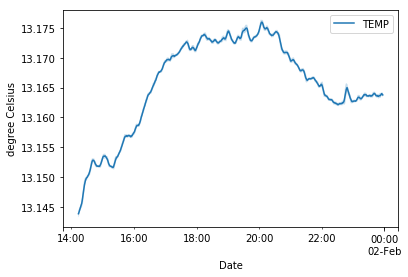

In [9]:
wf.tsplot('TEMP')